# NLP TEST Case Study

# Q.1 Text analysis, also known as text mining or natural language processing (NLP),
is the process of extracting meaningful insights, patterns, and information from
unstructured text data. It involves various techniques such as text preprocessing,
sentiment analysis, named entity recognition, topic modelling, and text classification.

We have a dataset consisting of articles and their corresponding titles. Each article
contains text that covers various topics related to data analysis, machine learning,
and related fields. The titles provide a concise summary of the main subject or theme
of each article.

The goal is to perform comprehensive text analysis on the provided dataset of
articles and titles. Specifically, we aim to achieve the following objectives:

1. Create word clouds to visualize the most frequent words in the titles.
2. Analyze the sentiment expressed in the articles to understand the overall tone
   or sentiment of the content.
3. Extract named entities such as organizations, locations, and other relevant
   information from the articles.
4. Apply topic modeling techniques to uncover latent topics within the articles.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\gajendra singh\\OneDrive\\Desktop\\pandas\\Text_Analysis_dataset.csv", encoding='ISO-8859-1')


In [3]:
df.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\gajendra
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean(Article):
    Article = str(Article).lower()
    Article = re.sub('\[.*?\]','',Article)
    Article = re.sub('https?://\S+|www\.S+','',Article)
    Article = re.sub('<.*?>+','',Article)
    Article = re.sub('[%s]'% re.escape(string.punctuation),'',Article)
    Article = re.sub('\n','',Article)
    Article = [word for word in Article.split(' ') if word not in stopwords]
    Article = " ".join(Article)
    return Article
df["Article"] = df["Article"].apply(clean)

In [6]:
def clean(Title):
    Title = str(Title).lower()
    Title = re.sub('\[.*?\]','',Title)
    Title = re.sub('https?://\S+|www\.S+','',Title)
    Title = re.sub('<.*?>+','',Title)
    Title = re.sub('[%s]'% re.escape(string.punctuation),'',Title)
    Title = re.sub('\n','',Title)
    Title = [word for word in Title.split(' ') if word not in stopwords]
    Title = " ".join(Title)
    return Title
df["Title"] = df["Title"].apply(clean)

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


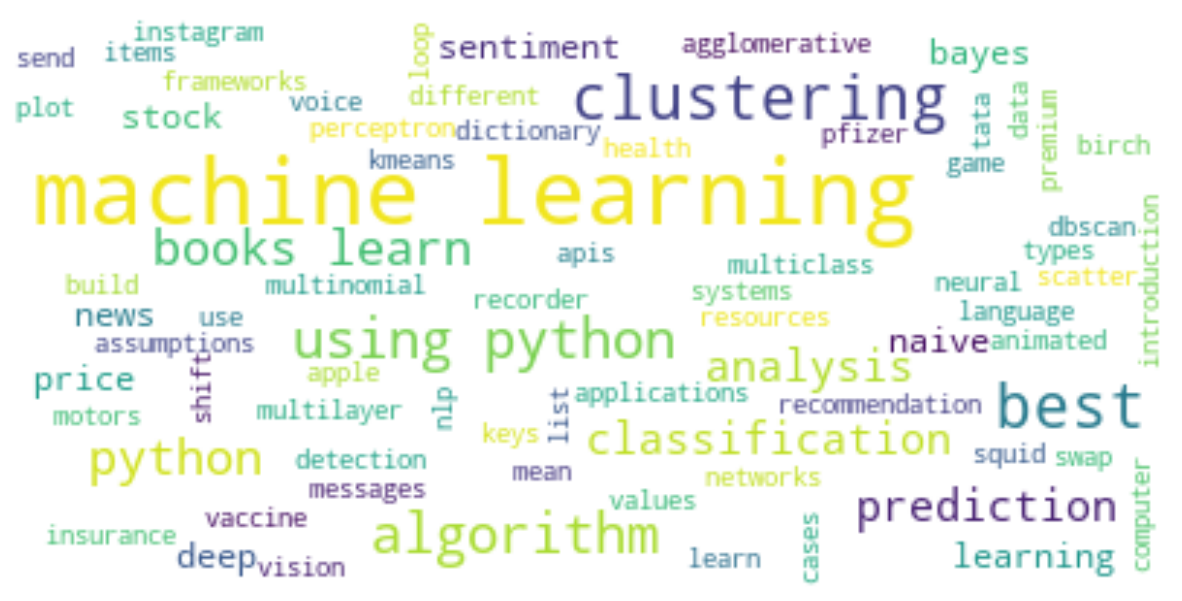

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.Title)
stopwords = set(STOPWORDS)
worldcloud = WordCloud(stopwords=stopwords,
                       background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

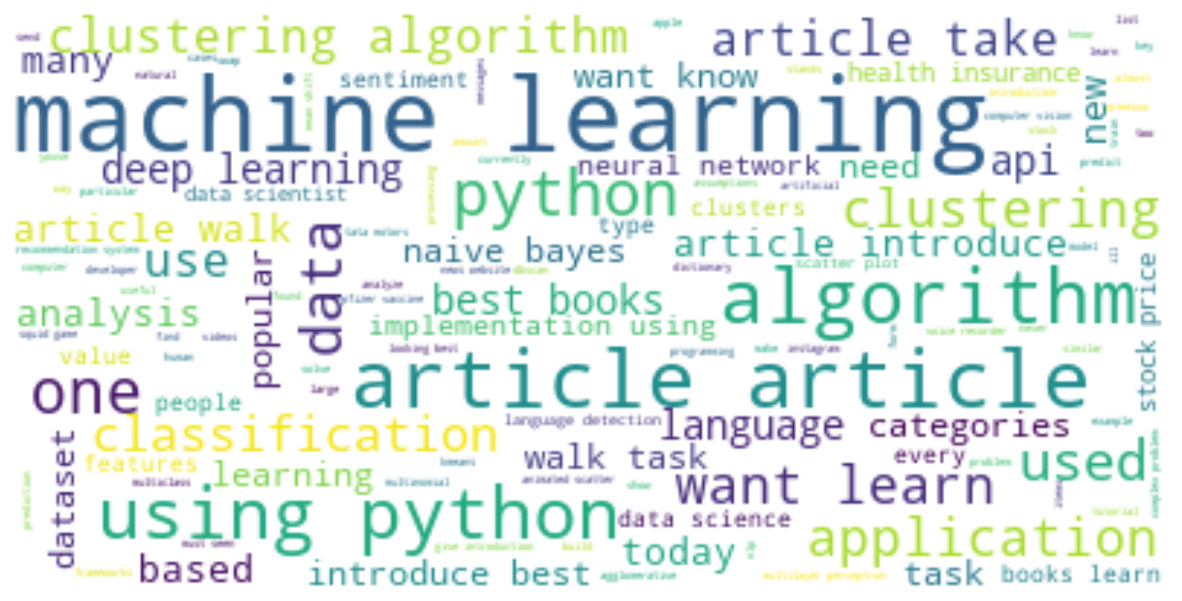

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.Article)
stopwords = set(STOPWORDS)
worldcloud = WordCloud(stopwords=stopwords,
                       background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install textblob

In [12]:
from textblob import TextBlob

# Assuming 'Article' is the column containing the text of the articles
df['Sentiment'] = df['Article'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the sentiment scores for each article
print(df[['Article', 'Sentiment']])


                                              Article  Sentiment
0   data analysis process inspecting exploring dat...   0.722222
1   performance machine learning algorithm particu...   0.166667
2   must seen news divided categories go news webs...   0.600000
3   two classes classification problem problem bin...   1.000000
4   multinomial naive bayes one variants naive bay...  -0.114286
5   must seen news divided categories go news webs...   0.600000
6   natural language processing nlp subfield artif...   0.283333
7   using thirdparty application api manage functi...   0.050000
8   twitter one popular social media apps people f...   0.383333
9   squid game currently one trending shows netfli...  -0.195238
10  computer vision one fields artificial intellig...   0.414286
11  python one popular programming languages today...   0.614286
12  api stands application programming interface w...   0.600000
13  voice recorder found every smartphone computer...   0.200000
14  language detection na

In [13]:
from textblob import TextBlob

# Assuming 'Article' is the column containing the text of the articles
df['Sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the sentiment scores for each article
print(df[['Title', 'Sentiment']])


                                                Title  Sentiment
0                      best books learn data analysis     1.0000
1             assumptions machine learning algorithms     0.0000
2                news classification machine learning     0.0000
3   multiclass classification algorithms machine l...     0.0000
4            multinomial naive bayes machine learning    -0.3000
5                news classification machine learning     0.0000
6                                best books learn nlp     1.0000
7                send instagram messages using python     0.0000
8      pfizer vaccine sentiment analysis using python     0.0000
9          squid game sentiment analysis using python    -0.4000
10                   best books learn computer vision     1.0000
11                        best resources learn python     1.0000
12                  best python frameworks build apis     1.0000
13                        voice recorder using python     0.0000
14                languag

In [15]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 5.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 10.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/12.8 MB 11.6 MB/s eta 0:00:01
     ------- -------------------------------- 2.5/12.8 MB 13.3 MB/s eta 0:00:01
     ---------- ----------------------------- 3.3/12.8 MB 13.9 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 15.2 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 14.9 MB/s eta 0:00:01
     ----------------- ---------------------- 5.5/12.8 MB 14.6 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.8 MB 14.6 MB/s eta 0:00:01
     -------------------- ------------------- 6.7/12.8 MB 14.2 MB/s eta 0:00:01
     ----------------------- ---------------- 7.4/12.8 MB 14.4 MB/s eta 0:00:01
     ------------------------ --------------- 7.8

In [16]:
import spacy

# Assuming df is your DataFrame with the 'Article' column
article_texts = df['Article']

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities from text
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the function to each article text
df['Named Entities'] = article_texts.apply(extract_named_entities)

# Display the DataFrame with named entities
print(df[['Article', 'Named Entities']])


                                              Article  \
0   data analysis process inspecting exploring dat...   
1   performance machine learning algorithm particu...   
2   must seen news divided categories go news webs...   
3   two classes classification problem problem bin...   
4   multinomial naive bayes one variants naive bay...   
5   must seen news divided categories go news webs...   
6   natural language processing nlp subfield artif...   
7   using thirdparty application api manage functi...   
8   twitter one popular social media apps people f...   
9   squid game currently one trending shows netfli...   
10  computer vision one fields artificial intellig...   
11  python one popular programming languages today...   
12  api stands application programming interface w...   
13  voice recorder found every smartphone computer...   
14  language detection natural language processing...   
15  multilayer perceptron mlp one simplest feedfor...   
16  neural network subset machi

In [17]:
pip install gensim

     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ---------------------------------------- 67.1/67.1 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=cc4a5a7a3bb0993d5b6be4a82a14960ff2dfc1706760fdbc54ae77ed4eb949b5
  Stored in directory: c:\users\gajendra singh\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=71c906d11697fbb7348d73d0d475c90e0fca01f1584d9655484c84c670345ce1
  Stored in directory: c:\users\gajendra singh\appdata\local\pip\cache\wheels\9d\ff\2f\afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
Note: you may need to restart the ker

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS

# Assuming df is your DataFrame with the 'Article' column
article_texts = df['Article']

# Combine the title and article text for each document
documents = df['Title'] + ' ' + df['Article']

# Preprocess the text (tokenization and removal of stopwords)
vectorizer = CountVectorizer(stop_words='english', max_df=0.85, max_features=5000, lowercase=True)
X = vectorizer.fit_transform(documents)

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 5  # You can adjust this based on your preference
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words_per_topic = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Add the topic distribution to the DataFrame
topic_distribution = lda.transform(X)
df_topics = pd.DataFrame(topic_distribution, columns=[f'Topic_{i}' for i in range(num_topics)])
df = pd.concat([df, df_topics], axis=1)

# Display the DataFrame with topic distribution and top words per topic
print(df[['Title', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']])
print("\nTop words per topic:")
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i}: {', '.join(top_words)}")


                                                Title   Topic_0   Topic_1  \
0                      best books learn data analysis  0.004670  0.981207   
1             assumptions machine learning algorithms  0.007278  0.007222   
2                news classification machine learning  0.005757  0.976914   
3   multiclass classification algorithms machine l...  0.006121  0.006207   
4            multinomial naive bayes machine learning  0.983419  0.004184   
5                news classification machine learning  0.005757  0.976914   
6                                best books learn nlp  0.005178  0.979357   
7                send instagram messages using python  0.004804  0.004784   
8      pfizer vaccine sentiment analysis using python  0.004672  0.004700   
9          squid game sentiment analysis using python  0.005148  0.005165   
10                   best books learn computer vision  0.005014  0.979934   
11                        best resources learn python  0.003961  0.003996   